In [2]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np

# Use 30 actively traded stocks in technology sector


In [3]:
import yfinance as yf
import pandas as pd

# List of technology stock tickers
stocks = [
    'TSLA', 'AAPL', 'AMD', 'NVDA', 'INTC', 'MSFT', 'META', 'AMZN', 'PLTR', 'NOW',
    'CRM', 'QCOM', 'MU', 'UBER', 'PYPL', 'PANW', 'NET', 'ADBE', 'CRWD', 'CVNA',
    'ZS', 'WDAY', 'SQ', 'ROKU','GOOGL', 'TWLO','SHOP', 'SNOW', 'SPLK', 'TEAM'
]

# List to store DataFrames for each stock
stock_dataframes = []

# Download adjusted close price data for each stock and store in DataFrame
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')

    # Select only the "Adj Close" column and rename it with the stock ticker
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})

    # Append DataFrame to list
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)

print(stock_prices.head())




[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                 TSLA       AAPL   AMD      NVDA       INTC       MSFT  \
Date                                                                     
2015-01-02  14.620667  24.402170  2.67  4.832578  28.073421  40.305367   
2015-01-05  14.006000  23.714729  2.66  4.750956  27.756859  39.934734   
2015-01-06  14.085333  23.716955  2.63  4.606915  27.239559  39.348591   
2015-01-07  14.063333  24.049517  2.58  4.594909  27.810913  39.848537   
2015-01-08  14.041333  24.973558  2.61  4.767758  28.328205  41.020794   

                 META     AMZN  PLTR        NOW  ...  ZS       WDAY  SQ  ROKU  \
Date                                             ...                            
2015-01-02  78.366852  15.4260   NaN  67.379997  ... NaN  80.410004 NaN   NaN   
2015-01-05  77.108192  15.1095   NaN  67.150002  ... NaN  80.010002 NaN   NaN   
2015-01-06  76.069290  14.7645   NaN  66.330002  ... NaN  79.419998 NaN   NaN   
2015-01-07  76.069290  14.9210   NaN  67.089996  ... NaN  79.349998 NaN   Na

# C=1 no short

Step 1: Calculate the Covariance Matrix using data of past three years 2021-01-05 to 2024-01-31

In [4]:
# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date] #2021-01-04 to 2024-01-31

# Calculate returns
returns = filtered_data.pct_change().dropna()   #773 rows
print(returns)
# Compute covariance matrix
cov_matrix = returns.cov()
filtered_data
print(cov_matrix.head())

                TSLA      AAPL       AMD      NVDA      INTC      MSFT  \
Date                                                                     
2021-01-05  0.007317  0.012364  0.005092  0.022210  0.018925  0.000964   
2021-01-06  0.028390 -0.033662 -0.026302 -0.058953  0.009682 -0.025929   
2021-01-07  0.079447  0.034123  0.053471  0.057830  0.021331  0.028457   
2021-01-08  0.078403  0.008631 -0.006095 -0.005040 -0.010347  0.006093   
2021-01-11 -0.078214 -0.023249  0.028230  0.025966 -0.002130 -0.009699   
...              ...       ...       ...       ...       ...       ...   
2024-01-25 -0.121253 -0.001697  0.011442  0.004156  0.009371  0.005738   
2024-01-26  0.003395 -0.009013 -0.017080 -0.009510 -0.119072 -0.002322   
2024-01-29  0.041910 -0.003586  0.003272  0.023496  0.004353  0.014334   
2024-01-30  0.003457 -0.019246 -0.032447  0.004947 -0.020986 -0.002758   
2024-01-31 -0.022444 -0.019358 -0.025398 -0.019865  0.003728 -0.026946   

                META      AMZN      P

Step 2: Retrieve the recent three month realized stocks returns

In [5]:
#As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = stock_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns
print(specific_months_returns.head())

                TSLA      AAPL       AMD      NVDA      INTC      MSFT  \
Date                                                                     
2024-02-02 -0.005030 -0.005405  0.042116  0.049709 -0.017528  0.018426   
2024-02-05 -0.036454  0.009847 -0.019307  0.047944  0.003991 -0.013545   
2024-02-06  0.022313  0.008632 -0.036446 -0.015995  0.002228 -0.000394   
2024-02-07  0.013398  0.000581  0.018227  0.027498  0.000936  0.021110   
2024-02-08  0.010555 -0.005755 -0.009301 -0.006534 -0.006545  0.000145   

                META      AMZN      PLTR       NOW  ...        ZS      WDAY  \
Date                                                ...                       
2024-02-02  0.203176  0.078666  0.042254  0.013359  ...  0.024952  0.002517   
2024-02-05 -0.032801 -0.008731 -0.017626  0.004531  ... -0.048975 -0.010212   
2024-02-06 -0.010209 -0.006811  0.308014 -0.009416  ...  0.011549 -0.010626   
2024-02-07  0.032701  0.008158  0.079104  0.016644  ...  0.042304  0.020060   
2024-02

Step 3: Set up the Markowitz Portfolio Optimization Problem

In [8]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0005  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [4.98314138e-10 3.77555399e-09 9.83342182e-10 3.72695520e-01
 1.17582690e-09 2.16801317e-01 2.11110576e-09 7.23966945e-10
 4.37858487e-10 9.17023397e-10 1.25522225e-09 8.41320448e-10
 1.12660818e-09 1.57445311e-09 2.60205295e-10 4.10503134e-01
 4.39100208e-10 1.00469059e-09 7.88989102e-10 3.21980881e-10
 5.29833962e-10 1.09928603e-09 2.21190958e-10 2.59537804e-10
 6.02895700e-09 2.12341547e-10 3.62535292e-10 4.00128901e-10
 6.72944200e-10 6.41061717e-10]


In [9]:
growth_rate = 1+specific_months_returns
daily_returns = growth_rate.dot(optimized_weights)
print(daily_returns.shape)
quarter_return = np.prod(daily_returns)
quarter_return


(61,)


1.0706110650163152

In [10]:
print("A Quarter Realized Return is:", quarter_return-1)
print("SD of Daily Portfolio Returns",np.std(daily_returns, ddof=1))

A Quarter Realized Return is: 0.0706110650163152
SD of Daily Portfolio Returns 0.025984641543784815


In [11]:
# Given data
quarter_return
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(optimized_weights))


Annualized Return: 0.3137928996969226
Annualized Standard Deviation: 0.4124933965920726
Sharpe Ratio: 0.6395081760734111
Max weight is 0.41050313419738677


# C = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])

In [12]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn = []
Sharpe =[]
SD = []
Max = []

for i in c_values:
  num_assets = 30
  expected_returns = returns.mean().values

  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0005  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 1.5
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]

  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value

  # Given data
  growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns) # this compares to
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

  Realizedreturn.append(annualized_return*100)
  Sharpe.append(sharpe_ratio)
  SD.append(daily_sd*100)
  Max.append(np.max(optimized_weights))






[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [13]:
print(Realizedreturn)
print(len(Realizedreturn))

[31.37929096282237, 36.1399904661033, 22.626547311703014, -1.4749593445059883, -3.3150367586233687, -0.8069740531742808, 3.313034619969568, 8.48227321655175, 8.482451627781561, 8.482195549829585, 8.483518062824281, 8.479492360507713, 8.4834639059288, 8.48232326963494]
14


In [14]:
print(SD)
print(len(SD))

[2.5984641450857144, 2.9190747649439612, 2.9329351823254366, 2.7846302727795353, 2.75545876835687, 2.7233829838613968, 2.7097794044417105, 2.6990549811570745, 2.699059606429152, 2.69905986512898, 2.699064118044536, 2.699052708929418, 2.6990637774167032, 2.69906043064357]
14


# Factor - model covariance

In [15]:
from google.colab import files
uploaded = files.upload()

Saving 5_Factors.CSV to 5_Factors.CSV


In [16]:
# Load the data, skipping the first two rows to ignore the introductory text
df = pd.read_csv('5_Factors.CSV', skiprows=2)

# Display the first few rows and the column names to confirm the structure
print(df.head())
print(df.columns)

   Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
0    19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
1    19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
2    19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012
3    19630705    0.40  0.09 -0.28  0.07 -0.30  0.012
4    19630708   -0.63  0.07 -0.20 -0.27  0.06  0.012
Index(['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')


In [17]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.set_index('Unnamed: 0', inplace=True)
# Filter the data to match the date
df = df[(df.index >= pd.Timestamp('2021-01-01')) & (df.index <= pd.Timestamp('2024-01-31'))]
print(df) # 774 rows

            Mkt-RF   SMB   HML   RMW   CMA     RF
Unnamed: 0                                       
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.000
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.000
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.000
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.000
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.000
...            ...   ...   ...   ...   ...    ...
2024-01-25    0.46  0.20  0.56 -0.19  0.55  0.022
2024-01-26   -0.02  0.35 -0.27  0.22 -0.02  0.022
2024-01-29    0.86  0.89 -0.59 -1.13 -0.31  0.022
2024-01-30   -0.13 -0.96  0.84  1.00  0.13  0.022
2024-01-31   -1.74 -0.89 -0.30 -0.21  0.37  0.022

[774 rows x 6 columns]


In [18]:
# Merge the stock prices with the factors on date
returns.index = pd.to_datetime(returns.index)
df.index = pd.to_datetime(df.index)
data = pd.concat([returns, df], axis=1).dropna()  # 773 Rows  2021-01-05 - 2024-01-30
data

,TSLA,AAPL,AMD,NVDA,INTC,MSFT,META,AMZN,PLTR,NOW,...,SHOP,SNOW,SPLK,TEAM,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-01-05,0.007317,0.012364,0.005092,0.022210,0.018925,0.000964,0.007548,0.010004,0.052632,0.009756,...,0.024112,0.020091,0.002104,0.012351,0.86,1.32,0.49,0.36,0.55,0.000
2021-01-06,0.028390,-0.033662,-0.026302,-0.058953,0.009682,-0.025929,-0.028269,-0.024897,-0.043089,-0.046469,...,-0.028094,-0.055702,-0.030710,-0.042403,0.79,3.15,3.94,0.06,0.53,0.000
2021-01-07,0.079447,0.034123,0.053471,0.057830,0.021331,0.028457,0.020622,0.007577,0.062022,0.008201,...,0.066421,0.134990,0.008911,0.039647,1.76,0.02,-0.83,-1.50,-0.20,0.000
2021-01-08,0.078403,0.008631,-0.006095,-0.005040,-0.010347,0.006093,-0.004354,0.006496,0.008000,0.035647,...,0.025346,-0.013478,0.014475,0.008998,0.51,-1.01,-1.37,-0.43,-0.37,0.000
2021-01-11,-0.078214,-0.023249,0.028230,0.025966,-0.002130,-0.009699,-0.040102,-0.021519,0.028968,-0.012424,...,-0.009488,-0.023026,0.006711,-0.020426,-0.51,0.54,1.26,-0.17,0.45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,-0.121253,-0.001697,0.011442,0.004156,0.009371,0.005738,0.006348,0.005610,-0.017313,0.004283,...,-0.002973,0.010794,0.000326,0.005225,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,0.003395,-0.009013,-0.017080,-0.009510,-0.119072,-0.002322,0.002442,0.008685,-0.006683,0.003587,...,0.013169,-0.016989,0.000391,0.014078,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,0.041910,-0.003586,0.003272,0.023496,0.004353,0.014334,0.017456,0.013449,0.045260,0.023134,...,0.024402,0.034714,0.001826,0.031801,0.86,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,0.003457,-0.019246,-0.032447,0.004947,-0.020986,-0.002758,-0.002394,-0.014015,-0.020480,-0.001918,...,-0.014484,-0.015701,-0.001432,0.006884,-0.13,-0.96,0.84,1.00,0.13,0.022


In [19]:
factors = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Convert these to numeric if not already
factors = factors.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced
factors = factors.dropna()

# Calculate the covariance matrix
factor_covariance_matrix = factors.cov()

# Display the covariance matrix
print(factor_covariance_matrix)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.337839  0.200752 -0.439214 -0.295037 -0.338805
SMB     0.200752  0.541250  0.104861 -0.215985 -0.001800
HML    -0.439214  0.104861  1.109992  0.323820  0.494091
RMW    -0.295037 -0.215985  0.323820  0.510852  0.178210
CMA    -0.338805 -0.001800  0.494091  0.178210  0.397571


Step 2: Run the linear regression

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from datetime import datetime
'''
# List of technology stock tickers
stocks = [
    'TSLA', 'AAPL', 'AMD', 'NVDA', 'INTC', 'MSFT', 'META', 'AMZN', 'PLTR', 'NOW',
    'CRM', 'QCOM', 'MU', 'UBER', 'PYPL', 'PANW', 'NET', 'ADBE', 'CRWD', 'CVNA',
    'ZS', 'WDAY', 'SQ', 'ROKU', 'TWLO', 'SHOP', 'SNOW', 'SPLK', 'TEAM', 'GOOGL'
]

# Download adjusted close price data for each stock and store in DataFrame
stock_dataframes = []
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)

# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date]

# Calculate returns
returns = filtered_data.pct_change().dropna()
'''
# Run linear regression
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for stock in stocks:
    y = returns[stock].dropna()
    X = factor_levels.loc[y.index]  # Align the index of factors with the stock returns
    X = sm.add_constant(X)  # Add constant term to the model
    model = sm.OLS(y, X)
    results = model.fit()
    regressions[stock] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }

# Extract beta coefficients for each stock into a DataFrame
betas_dict = {}
for stock, values in regressions.items():
    params = values['params']
    if isinstance(params, pd.Series):
        betas_dict[stock] = params.values
    else:
        betas_dict[stock] = params.iloc[:, 0].values

betas = pd.DataFrame(betas_dict, index=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']).T
print("Beta Coefficients:")
print(betas)

# Calculate the covariance matrix of factor levels (excluding the intercept)
factor_cov_matrix = factor_levels.cov()

# Calculate idiosyncratic variance (variance of residuals)
idiosyncratic_var = {stock: regressions[stock]['resid'].var() for stock in stocks}

# Asset covariance matrix calculation using factor model
# Initialize an empty DataFrame
asset_cov_matrix = pd.DataFrame(index=stocks, columns=stocks)

# Populate the asset covariance matrix
for stock_i in stocks:
    for stock_j in stocks:
        beta_i = regressions[stock_i]['params'].drop('const').values  # Exclude intercept
        beta_j = regressions[stock_j]['params'].drop('const').values  # Exclude intercept
        if stock_i == stock_j:
            # Diagonal elements: Variance from factors + idiosyncratic variance
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_i)) + idiosyncratic_var[stock_i]
        else:
            # Off-diagonal elements: Covariance from factors only
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_j))

print("Asset Covariance Matrix:")
print(asset_cov_matrix)


Beta Coefficients:
          const    Mkt-RF       SMB       HML       RMW       CMA
TSLA   0.000660  0.013522  0.001212 -0.002655 -0.008886 -0.008906
AAPL   0.000200  0.012821 -0.001666 -0.007304  0.003778  0.008487
AMD    0.001196  0.016137 -0.001585 -0.003326 -0.002143 -0.007311
NVDA   0.002434  0.017381 -0.003799 -0.004240 -0.001223 -0.009245
INTC  -0.000138  0.012092 -0.000665 -0.000567 -0.000760  0.001039
MSFT   0.000646  0.011287 -0.003996 -0.004733  0.003616 -0.000467
META   0.000704  0.013943 -0.001198 -0.004578  0.002624 -0.005074
AMZN   0.000122  0.012199 -0.004237 -0.000833 -0.000815 -0.009980
PLTR   0.001227  0.012398  0.008148 -0.006554 -0.015188 -0.004904
NOW    0.001011  0.012065 -0.002619 -0.005630 -0.004396 -0.005822
CRM    0.000556  0.011549 -0.003366 -0.002141 -0.005014 -0.002837
QCOM   0.000030  0.013984  0.000489 -0.002974  0.001101  0.000700
MU     0.000238  0.013414  0.002922 -0.001198  0.001424 -0.002581
UBER   0.001210  0.010862  0.002158  0.000098 -0.012058 -

In [22]:
import pandas as pd

# Assuming regressions dictionary contains regression results for each ETF
# Extract beta coefficients for each ETF into a DataFrame
betas = pd.DataFrame({stock: values['params'] for stock, values in regressions.items()})

# Optionally, if you're using Jupyter Notebook, simply write 'betas' without print() for a nicer format:
betas


,TSLA,AAPL,AMD,NVDA,INTC,MSFT,META,AMZN,PLTR,NOW,...,ZS,WDAY,SQ,ROKU,GOOGL,TWLO,SHOP,SNOW,SPLK,TEAM
const,0.000660,0.000200,0.001196,0.002434,-0.000138,0.000646,0.000704,0.000122,0.001227,0.001011,...,0.001578,0.000789,-0.000360,0.000252,0.000507,-0.000303,0.001177,0.001116,0.000749,0.001543
Mkt-RF,0.013522,0.012821,0.016137,0.017381,0.012092,0.011287,0.013943,0.012199,0.012398,0.012065,...,0.011885,0.010669,0.019061,0.013902,0.012135,0.011075,0.015737,0.011975,0.010208,0.011480
SMB,0.001212,-0.001666,-0.001585,-0.003799,-0.000665,-0.003996,-0.001198,-0.004237,0.008148,-0.002619,...,0.000125,-0.001354,0.003066,0.007655,-0.003477,0.002572,0.000823,-0.000203,0.000377,0.000558
HML,-0.002655,-0.007304,-0.003326,-0.004240,-0.000567,-0.004733,-0.004578,-0.000833,-0.006554,-0.005630,...,-0.007277,-0.004318,-0.003813,-0.004387,-0.002372,-0.004234,-0.003456,-0.003110,-0.005226,-0.004663
RMW,-0.008886,0.003778,-0.002143,-0.001223,-0.000760,0.003616,0.002624,-0.000815,-0.015188,-0.004396,...,-0.010829,-0.005517,-0.012890,-0.017904,0.002200,-0.015761,-0.013307,-0.014449,-0.009843,-0.011300
CMA,-0.008906,0.008487,-0.007311,-0.009245,0.001039,-0.000467,-0.005074,-0.009980,-0.004904,-0.005822,...,-0.010036,-0.003907,-0.007977,-0.008565,-0.003215,-0.014014,-0.016383,-0.016975,-0.001693,-0.015097


Step 3: Compute the Covariance matrix using
$$\Sigma_{R} = \beta^{T} \Sigma_{F} \beta + \Sigma_{\sigma}$$

In [24]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn_f = []
Sharpe_f =[]
SD_f = []
Max_f = []


for i in c_values:
  expected_returns = returns.mean().values

  # Optimization variables
  num_assets = 30
  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, asset_cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0005  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 2
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]
  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value
  optimized_return = portfolio_return.value
  optimized_variance = portfolio_variance.value

  #print("Optimized Weights:", optimized_weights)
  growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns)
  # Given data
  quarter_return
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd
  weight_diff = (weights_pos - weights_neg).value
  num_positive = np.sum(weight_diff > 0)
  num_negative = np.sum(weight_diff < 0)


  Realizedreturn_f.append(annualized_return*100)
  Sharpe_f.append(sharpe_ratio)
  SD_f.append(daily_sd*100)
  Max_f.append(np.max(weight_diff))
  #print("Annualized Return:", annualized_return)
  #print("Annualized Standard Deviation:", annualized_sd)
  #print("Sharpe Ratio:", sharpe_ratio)


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [25]:
print(Sharpe_f)
print(len(Sharpe_f))

[0.6967356968861387, 0.7903549029993732, 0.5432671727109964, 0.40115430151309406, 0.19902627240747525, 0.032589390550658355, 0.04074095317300742, 0.04076728387285481, 0.04076079940067512, 0.04075642549625233, 0.04075521995405895, 0.04076861048720343, 0.040756827605340835, 0.040754134579024576]
14


In [26]:
print(Realizedreturn_f)

[33.623296127424986, 41.28720843365193, 30.83766649298292, 24.4230477169892, 14.59581085477717, 6.555798534048929, 6.934377351519516, 6.935625808355295, 6.9353184665023715, 6.9351106579936594, 6.93505351989423, 6.935688250181893, 6.93512903074438, 6.935004600114714]


In [27]:
print(SD_f)

[2.587922767303736, 2.892218748934218, 2.995984446926865, 3.050040830878503, 3.0371832731347586, 3.0073006536501614, 2.9909540618883534, 2.9909513998192714, 2.9909522345485002, 2.990952024363892, 2.990952180342042, 2.9909505566780585, 2.990950912538276, 2.990956220383128]


# Return Comparison Graph

In [28]:
print(len(Realizedreturn))
print(len(Realizedreturn))

14
14


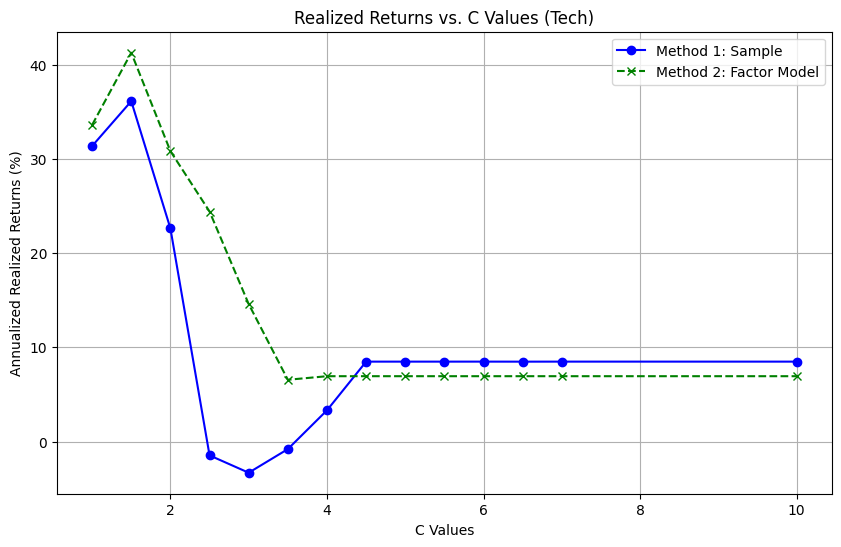

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Realizedreturn, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Realizedreturn_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('Realized Returns vs. C Values (Tech)')
plt.xlabel('C Values')
plt.ylabel('Annualized Realized Returns (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


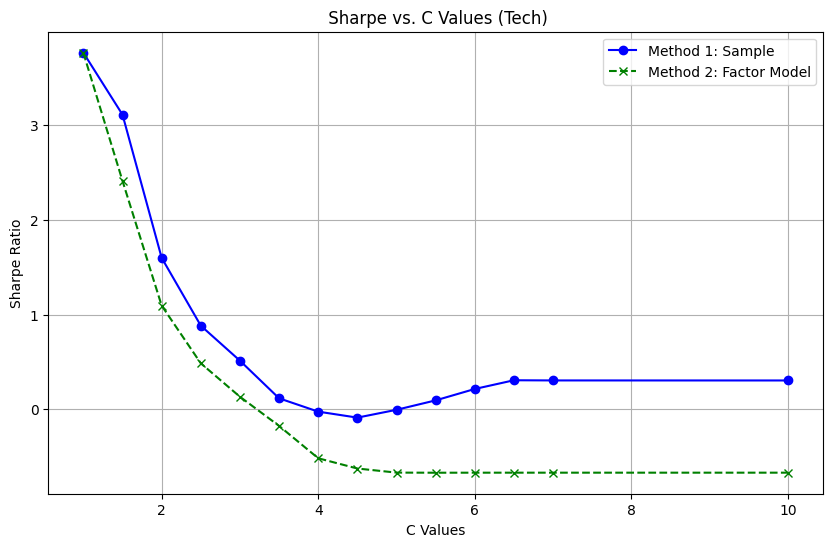

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Sharpe, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Sharpe_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title(' Sharpe vs. C Values (Tech)')
plt.xlabel('C Values')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


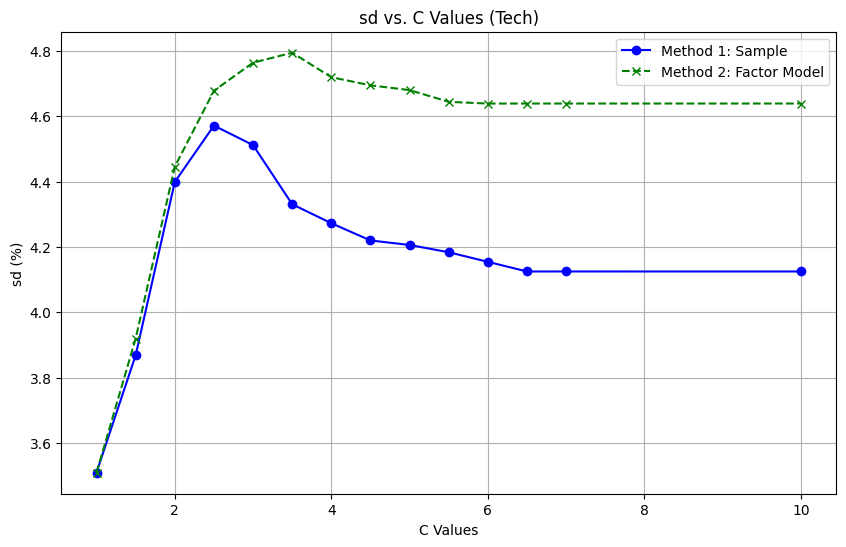

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, SD, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, SD_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('sd vs. C Values (Tech)')
plt.xlabel('C Values')
plt.ylabel('sd (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


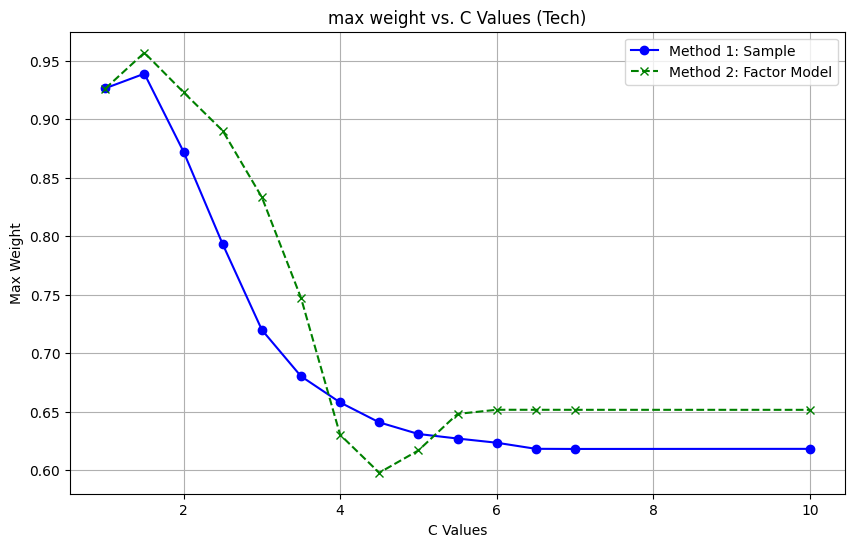

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Max, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Max_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('max weight vs. C Values (Tech)')
plt.xlabel('C Values')
plt.ylabel('Max Weight')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()
